In [37]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs/src/master/ german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
error: RPC failed; curl 56 GnuTLS recv error (-110): The TLS connection was non-properly terminated.
Unpacking objects: 100% (6/6), done.


In [39]:
!ls german-traffic-signs

ls: cannot access 'german-traffic-signs': No such file or directory


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [33]:
np.random.seed(0)

In [16]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [17]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [18]:
assert( X_train.shape[ 0 ] == y_train.shape[ 0 ]), "Training data: #images != #labels"
assert( X_test.shape[ 0 ] == y_test.shape[ 0 ]), "Testing data: #images != #labels"
assert( X_train.shape[ 1: ] == ( 28, 28 ) ), "The dimensions of the images have to be 28x28."
assert( X_test.shape[ 1: ] == ( 28, 28 ) ), "The dimensions of the images have to be 28x28."

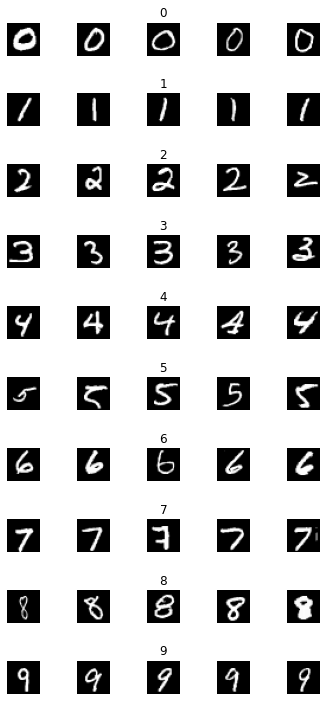

In [19]:
num_of_samples=[]

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


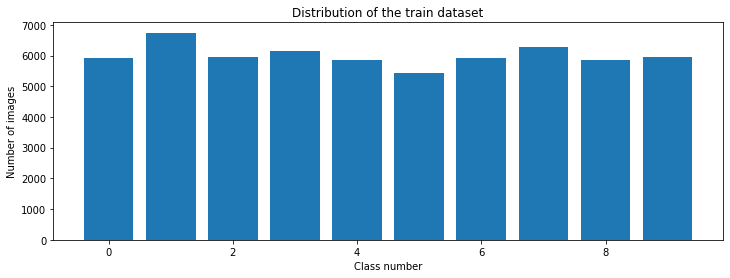

In [20]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [21]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255

In [22]:
# define the larger model
def leNet_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [23]:
model = leNet_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)              

In [24]:
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 7s 53ms/step - loss: 0.2075 - accuracy: 0.9325 - val_loss: 0.0643 - val_accuracy: 0.9807
Epoch 2/10
135/135 [==============================] - 5s 37ms/step - loss: 0.0682 - accuracy: 0.9793 - val_loss: 0.0523 - val_accuracy: 0.9848
Epoch 3/10
135/135 [==============================] - 5s 35ms/step - loss: 0.0540 - accuracy: 0.9827 - val_loss: 0.0392 - val_accuracy: 0.9867
Epoch 4/10
135/135 [==============================] - 5s 36ms/step - loss: 0.0487 - accuracy: 0.9846 - val_loss: 0.0344 - val_accuracy: 0.9905
Epoch 5/10
135/135 [==============================] - 5s 34ms/step - loss: 0.0470 - accuracy: 0.9852 - val_loss: 0.0398 - val_accuracy: 0.9893
Epoch 6/10
135/135 [==============================] - 5s 36ms/step - loss: 0.0418 - accuracy: 0.9871 - val_loss: 0.0459 - val_accuracy: 0.9875
Epoch 7/10
135/135 [==============================] - 5s 40ms/step - loss: 0.0449 - accuracy: 0.9865 - val_loss: 0.0353 - val_accuracy: 0.9907

Text(0.5, 0, 'epoch')

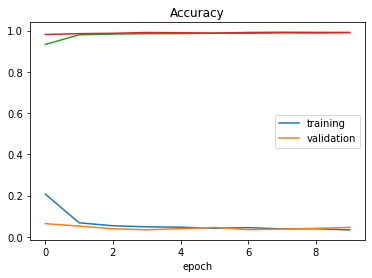

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

Test score: 0.04550032690167427
Test accuracy: 0.9883999824523926
(1, 28, 28, 1)
(1, 28, 28, 1)
predicted digit: [3]


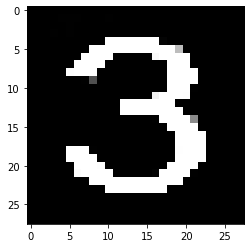

In [30]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

#predict internet number
import requests
from PIL import Image
url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'

r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)

print(img.shape)
print("predicted digit: "+str(model.predict_classes(img)))

(1, 24, 24, 30)
(1, 10, 10, 15)


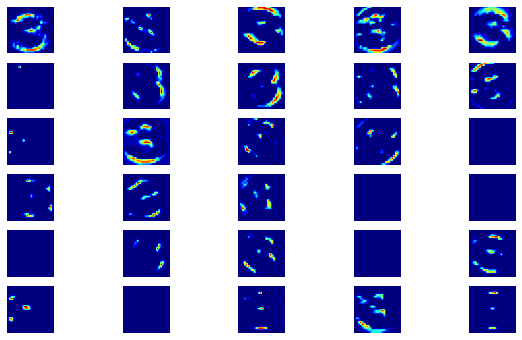

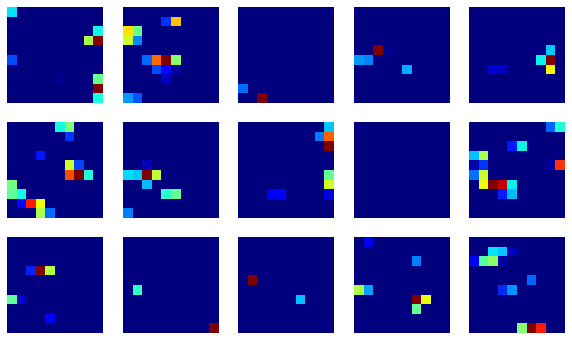

In [31]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)

print(visual_layer1.shape)
print(visual_layer2.shape)

#layer 1
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')